In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset_cuaca_perjam.csv")

In [3]:
df

,YEAR-MONTH-DAY,YEAR,MONTH,DAY,HOUR,T2M,RH2M,PS,WS10M
0,11/30/2013,2013.0,11.0,30.0,7:00:00,27.36,78.94,100.80,3.17
1,11/30/2013,2013.0,11.0,30.0,8:00:00,28.47,73.19,100.85,2.65
2,11/30/2013,2013.0,11.0,30.0,9:00:00,29.44,69.56,100.83,2.04
3,11/30/2013,2013.0,11.0,30.0,10:00:00,30.12,67.38,100.77,1.73
4,11/30/2013,2013.0,11.0,30.0,11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...,...,...,...,...,...
1048570,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,YEAR,MONTH,DAY,T2M,RH2M,PS,WS10M
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,2018.414157,6.524854,15.729412,27.466713,81.585563,100.829341,2.976495
std,2.886282,3.448991,8.801398,1.591940,8.568729,0.170545,1.322424
min,2013.000000,1.000000,1.000000,22.150000,41.310000,100.220000,0.010000
25%,2016.000000,4.000000,8.000000,26.290000,76.560000,100.710000,2.040000
50%,2018.000000,7.000000,16.000000,27.220000,83.810000,100.830000,2.900000
75%,2021.000000,10.000000,23.000000,28.600000,88.310000,100.950000,3.770000
max,2023.000000,12.000000,31.000000,34.150000,96.690000,101.440000,9.100000


In [5]:
# import matplotlib.pyplot as plt
# # plt.bar(df['PS'], height=0.8)

In [6]:
import matplotlib.pyplot as plt

## PREPROCESSING

In [7]:
df.dropna(inplace=True)

In [8]:
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'], axis=1)

In [9]:
df.isnull().sum()

YEAR-MONTH-DAY    0
HOUR              0
T2M               0
RH2M              0
PS                0
WS10M             0
dtype: int64

In [10]:
df.dtypes

YEAR-MONTH-DAY     object
HOUR               object
T2M               float64
RH2M              float64
PS                float64
WS10M             float64
dtype: object

In [11]:
df['YEAR-MONTH-DAY'] = pd.to_datetime(df['YEAR-MONTH-DAY'])
df['HOUR'] = pd.to_timedelta(df['HOUR'])
df['TIME'] = df['YEAR-MONTH-DAY'] + df['HOUR']

In [12]:
del df['YEAR-MONTH-DAY']
del df['HOUR']

In [13]:
df.dtypes

T2M             float64
RH2M            float64
PS              float64
WS10M           float64
TIME     datetime64[ns]
dtype: object

In [14]:
df.set_index(df['TIME'], inplace = True)

In [15]:
# df['T_target'] = df.shift(-1)['T2M']
# df['RH_target'] = df.shift(-1)['RH2M']
# df['PS_target'] = df.shift(-1)['PS']
# df['WS_target'] = df.shift(-1)['WS10M']

In [16]:
df.head()

,T2M,RH2M,PS,WS10M,TIME
TIME,,,,,
2013-11-30 07:00:00,27.36,78.94,100.80,3.17,2013-11-30 07:00:00
2013-11-30 08:00:00,28.47,73.19,100.85,2.65,2013-11-30 08:00:00
2013-11-30 09:00:00,29.44,69.56,100.83,2.04,2013-11-30 09:00:00
2013-11-30 10:00:00,30.12,67.38,100.77,1.73,2013-11-30 10:00:00
2013-11-30 11:00:00,30.44,66.38,100.70,1.87,2013-11-30 11:00:00


In [17]:
df.dropna(inplace=True)

In [18]:
# df.sort_index(inplace=True)

# start_date = '2021-04-01 09:00:00'
# end_date = '2022-05-01 16:00:00'


In [19]:
del df['TIME']

In [20]:
df

,T2M,RH2M,PS,WS10M
TIME,,,,
2013-11-30 07:00:00,27.36,78.94,100.80,3.17
2013-11-30 08:00:00,28.47,73.19,100.85,2.65
2013-11-30 09:00:00,29.44,69.56,100.83,2.04
2013-11-30 10:00:00,30.12,67.38,100.77,1.73
2013-11-30 11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...
2023-12-01 02:00:00,27.05,87.56,100.63,1.50
2023-12-01 03:00:00,26.88,89.00,100.62,1.87
2023-12-01 04:00:00,26.82,89.19,100.67,1.86


In [21]:
# df.plot(subplots=True, figsize=(10,4))

In [22]:
df

,T2M,RH2M,PS,WS10M
TIME,,,,
2013-11-30 07:00:00,27.36,78.94,100.80,3.17
2013-11-30 08:00:00,28.47,73.19,100.85,2.65
2013-11-30 09:00:00,29.44,69.56,100.83,2.04
2013-11-30 10:00:00,30.12,67.38,100.77,1.73
2013-11-30 11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...
2023-12-01 02:00:00,27.05,87.56,100.63,1.50
2023-12-01 03:00:00,26.88,89.00,100.62,1.87
2023-12-01 04:00:00,26.82,89.19,100.67,1.86


In [23]:

Q1 = np.percentile(df['T2M'], 25)
Q3 = np.percentile(df['T2M'], 75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = (df['T2M'] < lower_fence) | (df['T2M'] > upper_fence)
num_outliers = sum(outliers)

print("Jumlah outlier:", num_outliers)



Jumlah outlier: 389


In [24]:
df[outliers]

,T2M,RH2M,PS,WS10M
TIME,,,,
2014-11-03 12:00:00,32.07,58.44,100.86,3.47
2014-11-03 13:00:00,32.22,57.94,100.77,3.46
2014-11-03 14:00:00,32.12,58.31,100.70,3.65
2015-08-03 05:00:00,22.68,84.94,101.12,4.51
2015-08-04 05:00:00,22.65,85.69,101.04,3.59
...,...,...,...,...
2023-11-15 13:00:00,32.13,61.44,100.76,1.43
2023-11-15 14:00:00,32.13,61.19,100.68,1.42
2023-11-22 12:00:00,32.13,60.69,100.61,2.93


In [25]:
# import seaborn as sns
# def replace_interpolate(df, column):
#     sns.boxplot(df[column])
#     plt.title(f'Original Box Plot of {column}')
#     plt.show()

#     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper fences
#     lower_fence = Q1 - 1.5 * IQR
#     upper_fence = Q3 + 1.5 * IQR

#     # Identify outliers
#     outliers = (df[column] < lower_fence) | (df[column] > upper_fence)

#     # Replace outliers with NaN
#     df[column][outliers] = np.nan

#     # Interpolate the NaN values
#     df[column] = df[column].interpolate()

#     sns.boxplot(df[column])
#     plt.title(f'Box Plot after Replacing Outliers of {column}')
#     plt.show()

#     return df

# # Sample usage
# # Assuming 'df' is your DataFrame and 'T2M' is the column name you want to process
# df = replace_interpolate(df, 'T2M')

In [26]:
# df.sort_index(inplace=True)
# data_range = df.loc['2023-11-01 09:00:00':'2023-12-01 09:00:00']

In [27]:
# df['2021':'2022'].plot(subplots=True, figsize=(20,12))

In [28]:
# data_range['T2M'].plot()

## SPLITTING DATA

In [29]:
# df = df['2022':]

In [30]:
df = df.sort_index()

train_percentage = 0.8
train_size = int(len(df) * train_percentage)

# train_data = df[:train_size].resample('M').mean()
# test_data = df[train_size:].resample('M').mean()

train_data = df[:train_size]
test_data = df[train_size:]

In [31]:
train_data.shape

(70137, 4)

In [32]:
df.index

DatetimeIndex(['2013-11-30 07:00:00', '2013-11-30 08:00:00',
               '2013-11-30 09:00:00', '2013-11-30 10:00:00',
               '2013-11-30 11:00:00', '2013-11-30 12:00:00',
               '2013-11-30 13:00:00', '2013-11-30 14:00:00',
               '2013-11-30 15:00:00', '2013-11-30 16:00:00',
               ...
               '2023-11-30 21:00:00', '2023-11-30 22:00:00',
               '2023-11-30 23:00:00', '2023-12-01 00:00:00',
               '2023-12-01 01:00:00', '2023-12-01 02:00:00',
               '2023-12-01 03:00:00', '2023-12-01 04:00:00',
               '2023-12-01 05:00:00', '2023-12-01 06:00:00'],
              dtype='datetime64[ns]', name='TIME', length=87672, freq=None)

In [33]:
df

,T2M,RH2M,PS,WS10M
TIME,,,,
2013-11-30 07:00:00,27.36,78.94,100.80,3.17
2013-11-30 08:00:00,28.47,73.19,100.85,2.65
2013-11-30 09:00:00,29.44,69.56,100.83,2.04
2013-11-30 10:00:00,30.12,67.38,100.77,1.73
2013-11-30 11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...
2023-12-01 02:00:00,27.05,87.56,100.63,1.50
2023-12-01 03:00:00,26.88,89.00,100.62,1.87
2023-12-01 04:00:00,26.82,89.19,100.67,1.86


In [34]:
# train_df = weather_df['2000':'2015'].resample('M').mean()
# train_df = train_df.fillna(train_df.mean())
# test_df = weather_df['2016':'2017'].resample('M').mean()
# test_df = test_df.fillna(test_df.mean())

In [35]:
import matplotlib.pyplot as plt
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(10,5))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

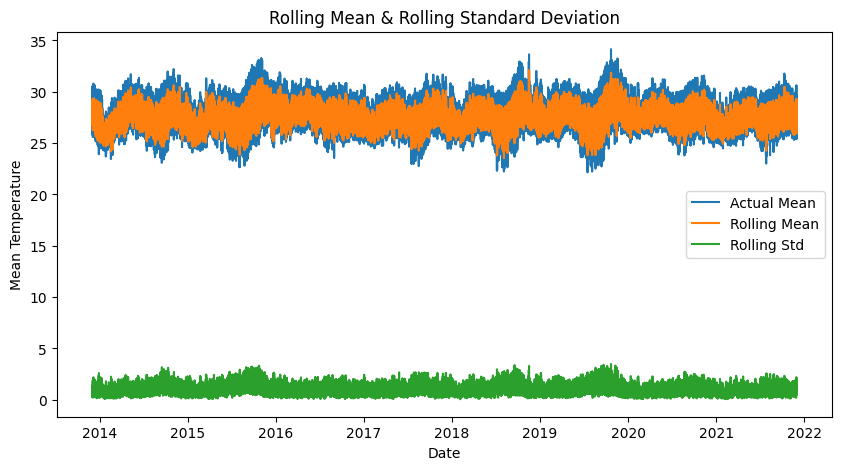

In [36]:
plot_rolling_mean_std(train_data.T2M)

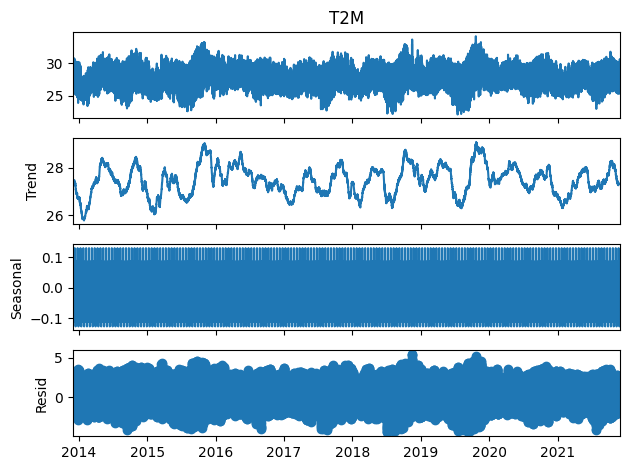

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data.T2M, model="additive", period=365)
fig = result.plot()

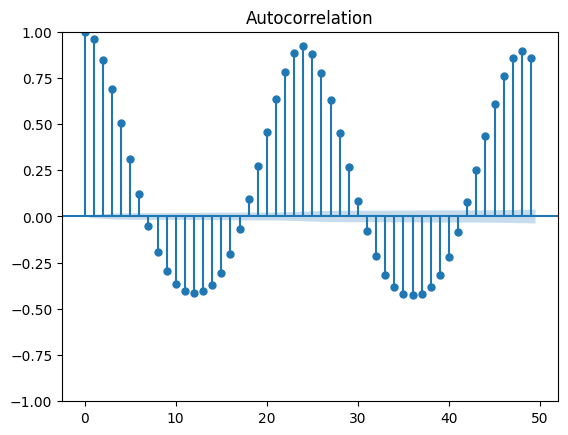

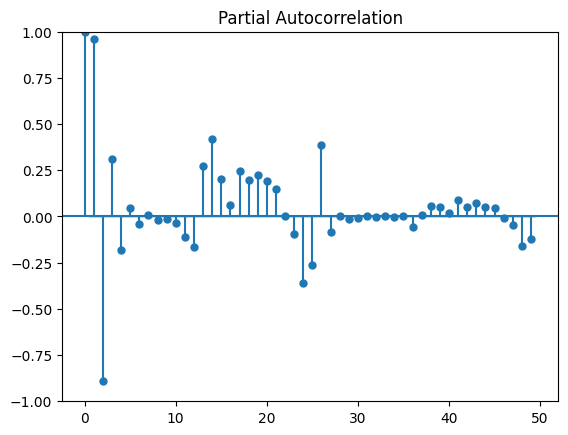

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_data.T2M)
pacf_original = plot_pacf(train_data.T2M)

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_data.T2M)
print(f'p-value: {adf_test[1]}')

p-value: 1.8996113834665194e-23


In [40]:
# #ARIMA model
# import statsmodels.api as smapi
# from statsmodels.tsa.arima.model import ARIMA

# p=4
# d=0
# q=0
# model = ARIMA(train_data.T2M, order=(p,d,q))
# model_fit = model.fit()
# print(model_fit.summary())

In [41]:
import statsmodels.api as sm

exog = train_data[['RH2M', 'PS', 'WS10M']]

model_sarima = sm.tsa.SARIMAX(train_data['T2M'], exog=exog, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

c:\Users\user\Documents\skripsi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\user\Documents\skripsi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\user\Documents\skripsi\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MemoryError: Unable to allocate 334. MiB for an array with shape (25, 25, 70137) and data type float64

In [ ]:
# import pmdarima as pm
# SARIMAX_model = pm.auto_arima(train_data['T2M'], exog=exog,
#                            start_p=1, start_q=1,
#                            test='adf',
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=None, D=1, 
#                            trace=False,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

In [ ]:
# import statsmodels.api as sm
# import pmdarima as pm

# exog = train_data[['RH2M', 'PS', 'WS10M']]
# SARIMAX_model = pm.auto_arima(df[['T2M']], exog=exog,
#                            start_p=1, start_q=1,
#                            test='adf',
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=None, D=1, 
#                            trace=False,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

In [ ]:
# #SARIMA model
# p=4
# d=0
# q=5
# model = smapi.tsa.statespace.SARIMAX(train_data.T2M, order=(p,d,q), seasonal_order=(p,d,q,12))
# model_fit = model.fit()
# print(model_fit.summary())

In [ ]:
# # Plot residual errors
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
# residuals = pd.DataFrame(model_fit_sarima.resid)
# residuals.columns = ['Residuals']
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

In [ ]:
# acf_res = plot_acf(model_fit_sarima.resid)
# pacf_res = plot_pacf(model_fit_sarima.resid)

In [ ]:
# import scipy.stats as stats
# stats.probplot(model_fit_sarima.resid, dist="norm", plot=plt)
# plt.title('Q-Q Plot of Residuals')
# plt.show()

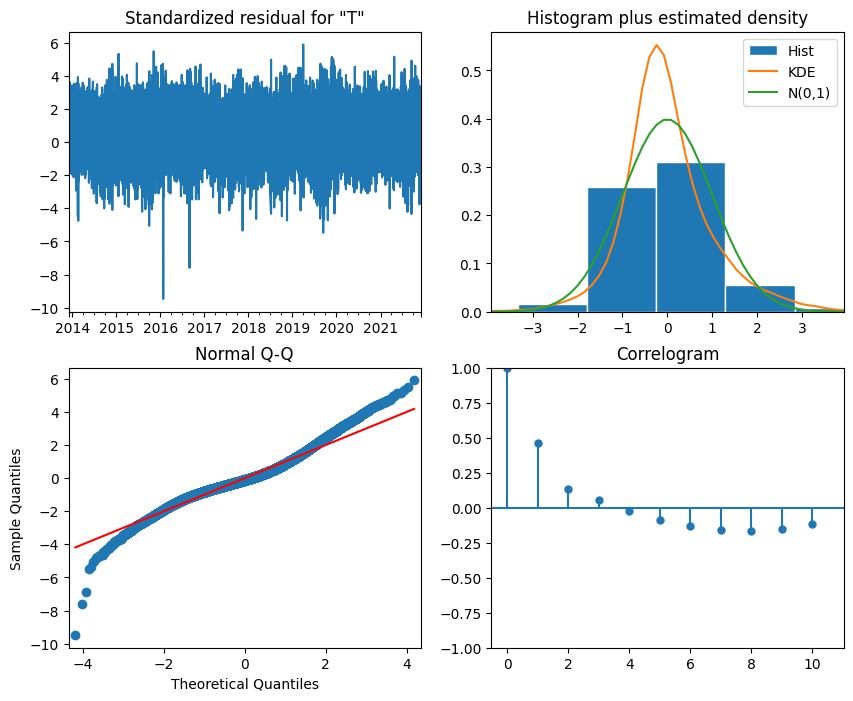

In [ ]:
model_fit_sarima.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
# forecast = model_fit_sarima.get_forecast()
# forecast_mean = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

# # Plot hasil prediksi
# fig, ax = plt.subplots()
# df['T2M'].loc['2023-01-01':].plot(ax=ax, label='Observed')
# forecast_mean.plot(ax=ax, style='k--', label='Forecast')
# ax.fill_between(forecast_ci.index,
#                 forecast_ci.iloc[:, 0],
#                 forecast_ci.iloc[:, 1], color='k', alpha=0.1)
# ax.set_xlabel('Date')
# ax.set_ylabel('Temperature')
# plt.legend()
# plt.show()

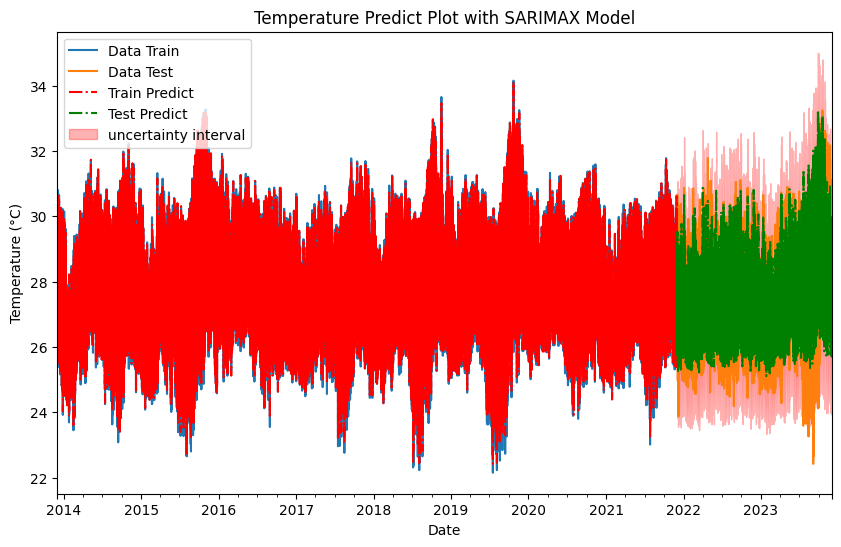

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Forecast on test data
forecast_test = model_fit_sarima.get_forecast(steps=len(test_data), exog=test_data[['RH2M', 'PS', 'WS10M']])
forecast_mean_test = forecast_test.predicted_mean

# Forecast on train data using predict method
forecast_mean_train = model_fit_sarima.predict(start=train_data.index[0], end=train_data.index[-1], exog=train_data[['RH2M', 'PS', 'WS10M']])

# Confidence interval
forecast_ci = forecast_test.conf_int()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot observed data
train_data['T2M'].plot(ax=ax, label='Data Train', linestyle='-')
test_data['T2M'].plot(ax=ax, label='Data Test', linestyle='-')

# Plot forecasts
forecast_mean_train.plot(ax=ax, label='Train Predict', color='red', linestyle='-.')
forecast_mean_test.plot(ax=ax, label='Test Predict', color='green', linestyle='-.')

# Plot confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=0.3, label='uncertainty interval')

# Add error metrics
# plt.text(0.5, 0.01, f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}', transform=ax.transAxes,
#          fontsize=12, verticalalignment='bottom', horizontalalignment='center',
#          bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Set labels and legends
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
plt.title('Temperature Predict Plot with SARIMAX Model')
plt.legend()
plt.show()


In [ ]:
# Calculate error metrics for test data
mae = mean_absolute_error(test_data['T2M'], forecast_mean_test)
mse = mean_squared_error(test_data['T2M'], forecast_mean_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data['T2M'], forecast_mean_test) * 100

In [ ]:
print('mae :', mae)
print('mse :', mse)
print('rmse :', rmse)
print('mape :', mape)


mae : 0.6278902044195773
mse : 0.6570594942811486
rmse : 0.8105920640378541
mape : 2.2869749562420996


In [ ]:
# future_exog = test_data[['RH2M', 'PS', 'WS10M']]

# # Plotting predictions
# fig, ax = plt.subplots(figsize=(10, 6))
# ax = df['T2M'].plot(ax=ax, label='Observed')
# plot_predict(model_fit_sarima, test_data['T2M'], exog=future_exog, ax=ax)
# ax.set_xlabel('Date')
# ax.set_ylabel('Temperature')
# plt.legend()
# plt.show()

In [ ]:
# # # Forecast values for test_df

# fc = model_fit_sarima.predict(len(train_data), len(train_data)+len(test_data)-1) 

# # Make as pandas series
# fc_series = pd.Series(fc, index=test_data.index)

# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='training')
# plt.plot(test_data, label='actual')
# plt.plot(fc, label='forecast')
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper right', fontsize=8)
# plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# mae = mean_absolute_error(test_data, fc)
# mape = mean_absolute_percentage_error(test_data, fc)
# mse = np.sqrt(mean_squared_error(test_data, fc))

# print(f'mae: {mae}')
# print(f'mape: {mape}')
# print(f'mse: {mse}')

In [ ]:
# df.reset_index(inplace = True)

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=15)
# for train_index, test_index in tscv.split(df):
#     train_data = df.iloc[train_index]
#     test_data = df.iloc[test_index]

In [ ]:
# train_data = df.iloc[:800]
# test_data = df.iloc[-400:]

In [ ]:
# df_train = df_train[['TIME', 'T2M']]
# df_test = df_test[['TIME', 'T2M']]

In [ ]:
# df.reset_index(inplace = True)

In [ ]:
# df.iloc[:, 0]

In [ ]:
# from sklearn.model_selection import train_test_split
# data_train, data_test = df.iloc[:, 0].values, df.iloc[:, 1].values

In [ ]:
# data_train, data_test = train_test_split(data_train, data_test, test_size=0.2, random_state=42)

In [ ]:
# print("shape of original dataset :", df.shape)
# print("shape of input - training set", X_train.shape)
# print("shape of output - training set", y_train.shape)
# print("shape of input - testing set", X_test.shape)
# print("shape of output - testing set", y_test.shape)

In [ ]:
# df.index = df.index.astype('int64')

In [ ]:
# msk = (df.index < len(df)-30)
# df_train = df[msk].copy()
# df_test = df[~msk].copy()

In [ ]:
# df_train = df_train[['TIME','T2M']]
# df_train.values

# --------------------------------------------------------------------------------------------

In [ ]:
# df = df.sort_index()

# train_percentage = 0.8
# train_size = int(len(df) * train_percentage)

# train_data = df[:train_size]
# test_data = df[train_size:]

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf_original = plot_acf(train_data)
# pacf_original = plot_pacf(train_data)

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# adf_test = adfuller(train_data)
# print(f'p-value: {adf_test[1]}')

In [ ]:
# df_train_diff = train_data.diff().dropna()
# df_train_diff.plot()

In [ ]:
# acf_diff = plot_acf(df_train_diff)
# pacf_diff = plot_pacf(df_train_diff)

In [ ]:
# adf_test = adfuller(df_train_diff)
# print(f'p-value: {adf_test[1]}')

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings("ignore")

# model = ARIMA(train_data, order=(1,1,3))
# model_fit = model.fit()
# print(model_fit.summary())

In [ ]:
# import matplotlib.pyplot as plt
# residuals = model_fit.resid[1:]
# fig, ax = plt.subplots(1,2)
# residuals.plot(title='Residuals', ax=ax[0])
# residuals.plot(title='Density', kind='kde', ax=ax[1])
# plt.show()

In [ ]:
# acf_res = plot_acf(residuals)
# pacf_res = plot_pacf(residuals)

In [ ]:
# forecast_test = model_fit.forecast(len(test_data))

# df['forecast'] = [None]*len(train_data) + list(forecast_test)

# df.plot()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# mae = mean_absolute_error(test_data, forecast_test)
# mape = mean_absolute_percentage_error(test_data, forecast_test)
# rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

# print(f'mae - manual: {mae}')
# print(f'mape - manual: {mape}')
# print(f'rmse - manual: {rmse}')

In [ ]:
# df

### AUTO ARIMA

In [ ]:
# import pmdarima as pm
# model_auto = pm.auto_arima(train_data, stepwise=False, seasonal=False)
# model_auto

In [ ]:
# from pmdarima.arima import auto_arima

# model_auto = auto_arima(train_data, start_p=1, start_q=1,
#                       test='adf',
#                       max_p=5, max_q=5,
#                       m=1,             
#                       d=1,          
#                       seasonal=False,   
#                       start_P=0, 
#                       D=None, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

In [ ]:
# model_auto

In [ ]:
# model_auto.summary()

In [ ]:
# forecast_test_auto = model_auto.predict(n_periods=len(test_data))
# df['forecast_auto'] = [None]*len(train_data) + list(forecast_test_auto)

# df.plot()

In [ ]:
# df

In [ ]:
# mae = mean_absolute_error(test_data, forecast_test_auto)
# mape = mean_absolute_percentage_error(test_data, forecast_test_auto)
# rmse = np.sqrt(mean_squared_error(test_data, forecast_test_auto))

# print(f'mae - auto: {mae}')
# print(f'mape - auto: {mape}')
# print(f'rmse - auto: {rmse}')

In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# df.dropna()